# SaaS Subscription and Churn Analysis

## What is SaaS?

SaaS (Software as a Service) is a cloud-based software delivery model where applications are hosted online and accessed by users via the internet, typically through a subscription model.
Instead of installing and maintaining software on individual computers, customers can use SaaS platforms anytime, anywhere, by simply logging in.
Examples include Netflix, Zoom, Google Workspace, and Slack.



## Why Churn Analysis Matters in SaaS?

Churn refers to when customers stop using a service or cancel their subscription.
In SaaS, tracking churn rates is essential because:

**It helps understand customer behavior.**

**It identifies reasons for customer drop-off.**

**It enables data-driven decisions to improve customer retention.**

By analyzing churn and subscription data together, businesses can predict future churn and improve customer satisfaction.

## About the Dataset

This dataset contains multiple interconnected tables from a fictional SaaS company called Ravenstack.
It tracks customer accounts, subscriptions, churn events, feature usage, and support tickets.
These tables can be merged using common keys like account_id and subscription_id to create a complete picture of the customer journey.

**Dataset resource :** 
https://www.kaggle.com/datasets/rivalytics/saas-subscription-and-churn-analytics-dataset?utm_source=chatgpt.com

## Dataset Files and Key Columns



#### 1. ravenstack_accounts.csv

**account_id** → Unique ID for each customer.

**account_name** → Name of the customer account.

**industry** → Industry category of the customer.

**region** → Geographic region of the customer.

**created_at** → Date the account was created.



#### 2. ravenstack_subscriptions.csv
    
**subscription_id** → Unique ID for each subscription.

**account_id** → Links to the customer in accounts.

**plan_name** → Name of the subscription plan.

**start_date, end_date** → Subscription timeline.

**status** → Active, canceled, or expired.

#### 3. ravenstack_churn_events.csv

**churn_event_id** → Unique churn record ID.

**subscription_id** → Links to the subscription.

**churn_date** → Date the customer churned.

**churn_reason** → Reason for cancellation.

#### 4. ravenstack_feature_usage.csv

**feature_usage_id** → Unique record of usage.

**account_id** → Links to customer account.

**feature_name** → Name of the feature used.

**usage_count** → Number of times used.

#### 5. ravenstack_support_tickets.csv

**ticket_id** → Unique ticket number.

**account_id** → Links to the customer.

**issue_type** → Type of issue reported.

**created_at, resolved_at** → Ticket timeline.



## Purpose of Analysis

The goal of this project is to:

*Understand customer subscription patterns.*

*Identify churn trends and reasons.*

*Correlate feature usage and support interactions with churn.*

*Provide actionable insights to reduce churn.*



## Loading Dataset and Libraries

Importing libraries

In [1]:
import pandas as pd
import numpy as np

**Loading all Datasets**

In [5]:
accounts_df = pd.read_csv("ravenstack_accounts.csv")
churn_df = pd.read_csv("ravenstack_churn_events.csv")
features_df = pd.read_csv("ravenstack_feature_usage.csv")
subs_df = pd.read_csv("ravenstack_subscriptions.csv")
support_df = pd.read_csv("ravenstack_support_tickets.csv")

**Merging all Datasets into One**

Merging all datasets into a single file for efficient visualisation and exploratory purposes.

In [6]:
merged_df = pd.merge(subs_df, accounts_df, on='account_id', how='left')
merged_df = pd.merge(merged_df, churn_df, on='account_id', how='left')
merged_df = pd.merge(merged_df, support_df, on='account_id', how='left')
merged_df = pd.merge(merged_df, features_df, on='subscription_id', how='left')

Converting the merged Dataset into a single csv file

In [7]:
merged_df.to_csv("merged_saas_dataset.csv", index=False)

**Loading Merged Dataset**

In [2]:
master_df = pd.read_csv("merged_saas_dataset.csv",low_memory=False)

## Inspecting Dataset

 Preview of Merged dataset

In [12]:
print(master_df.head())

  subscription_id account_id  start_date    end_date plan_tier_x  seats_x  \
0        S-8cec59   A-3c1a3f  2023-12-23  2024-04-12  Enterprise       14   
1        S-8cec59   A-3c1a3f  2023-12-23  2024-04-12  Enterprise       14   
2        S-8cec59   A-3c1a3f  2023-12-23  2024-04-12  Enterprise       14   
3        S-8cec59   A-3c1a3f  2023-12-23  2024-04-12  Enterprise       14   
4        S-8cec59   A-3c1a3f  2023-12-23  2024-04-12  Enterprise       14   

   mrr_amount  arr_amount  is_trial_x  upgrade_flag  ...  \
0        2786       33432       False         False  ...   
1        2786       33432       False         False  ...   
2        2786       33432       False         False  ...   
3        2786       33432       False         False  ...   
4        2786       33432       False         False  ...   

   first_response_time_minutes  satisfaction_score escalation_flag  usage_id  \
0                         20.0                 NaN           False  U-ee0af2   
1               

In [13]:
master_df

,subscription_id,account_id,start_date,end_date,plan_tier_x,seats_x,mrr_amount,arr_amount,is_trial_x,upgrade_flag,...,first_response_time_minutes,satisfaction_score,escalation_flag,usage_id,usage_date,feature_name,usage_count,usage_duration_secs,error_count,is_beta_feature
0,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-ee0af2,2024-06-21,feature_32,15.0,8670.0,1.0,True
1,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-eebc9c,2024-03-01,feature_5,6.0,1308.0,0.0,False
2,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-4cc6e9,2024-10-06,feature_11,10.0,330.0,1.0,False
3,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-e22a1b,2023-12-03,feature_40,5.0,2475.0,0.0,False
4,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-3fbbbc,2023-07-14,feature_21,15.0,8055.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147891,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-45db93,2024-12-22,feature_25,12.0,4488.0,2.0,True
147892,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-b2915b,2024-10-02,feature_26,15.0,885.0,0.0,False
147893,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-3d574e,2023-04-14,feature_31,7.0,2660.0,0.0,True
147894,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-1daedc,2024-03-11,feature_34,11.0,3960.0,2.0,False


**Check shape and columns**

In [17]:
# shape
print(master_df.shape)

(147896, 46)


Merged dataset contains 147896 rows and 46 columns.

In [18]:
# Columns
print(master_df.columns)

Index(['subscription_id', 'account_id', 'start_date', 'end_date',
       'plan_tier_x', 'seats_x', 'mrr_amount', 'arr_amount', 'is_trial_x',
       'upgrade_flag', 'downgrade_flag', 'churn_flag_x', 'billing_frequency',
       'auto_renew_flag', 'account_name', 'industry', 'country', 'signup_date',
       'referral_source', 'plan_tier_y', 'seats_y', 'is_trial_y',
       'churn_flag_y', 'churn_event_id', 'churn_date', 'reason_code',
       'refund_amount_usd', 'preceding_upgrade_flag',
       'preceding_downgrade_flag', 'is_reactivation', 'feedback_text',
       'ticket_id', 'submitted_at', 'closed_at', 'resolution_time_hours',
       'priority', 'first_response_time_minutes', 'satisfaction_score',
       'escalation_flag', 'usage_id', 'usage_date', 'feature_name',
       'usage_count', 'usage_duration_secs', 'error_count', 'is_beta_feature'],
      dtype='object')


Heads of 46 columns

In [4]:
# Datatypes of each corresponding columns
master_df.dtypes

subscription_id                 object
account_id                      object
start_date                      object
end_date                        object
plan_tier_x                     object
seats_x                          int64
mrr_amount                       int64
arr_amount                       int64
is_trial_x                        bool
upgrade_flag                      bool
downgrade_flag                    bool
churn_flag_x                      bool
billing_frequency               object
auto_renew_flag                   bool
account_name                    object
industry                        object
country                         object
signup_date                     object
referral_source                 object
plan_tier_y                     object
seats_y                          int64
is_trial_y                        bool
churn_flag_y                      bool
churn_event_id                  object
churn_date                      object
reason_code              

**Columns and corresponding Datatypes:**

int64 = 64 bit integer

float64 = 64 bit double precision floating number

Object = mixed datatypes included in a column

bool = boolean true or false data

In [12]:
# first 5 rows of dataset
master_df.head()

,subscription_id,account_id,start_date,end_date,plan_tier_x,seats_x,mrr_amount,arr_amount,is_trial_x,upgrade_flag,...,first_response_time_minutes,satisfaction_score,escalation_flag,usage_id,usage_date,feature_name,usage_count,usage_duration_secs,error_count,is_beta_feature
0,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-ee0af2,2024-06-21,feature_32,15.0,8670.0,1.0,True
1,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-eebc9c,2024-03-01,feature_5,6.0,1308.0,0.0,False
2,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-4cc6e9,2024-10-06,feature_11,10.0,330.0,1.0,False
3,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-e22a1b,2023-12-03,feature_40,5.0,2475.0,0.0,False
4,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,...,20.0,NaN,False,U-3fbbbc,2023-07-14,feature_21,15.0,8055.0,0.0,False


In [13]:
# last 5 rows of dataset 
master_df.tail()

,subscription_id,account_id,start_date,end_date,plan_tier_x,seats_x,mrr_amount,arr_amount,is_trial_x,upgrade_flag,...,first_response_time_minutes,satisfaction_score,escalation_flag,usage_id,usage_date,feature_name,usage_count,usage_duration_secs,error_count,is_beta_feature
147891,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-45db93,2024-12-22,feature_25,12.0,4488.0,2.0,True
147892,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-b2915b,2024-10-02,feature_26,15.0,885.0,0.0,False
147893,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-3d574e,2023-04-14,feature_31,7.0,2660.0,0.0,True
147894,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-1daedc,2024-03-11,feature_34,11.0,3960.0,2.0,False
147895,S-71fc3d,A-ccb686,2024-12-06,NaN,Enterprise,10,1990,23880,False,False,...,30.0,4.0,False,U-1fb3e3,2023-06-29,feature_29,12.0,2844.0,1.0,False


 **Checking and correcting missing values**

In [8]:
print(master_df.isnull().sum())

subscription_id                     0
account_id                          0
start_date                          0
end_date                       133296
plan_tier_x                         0
seats_x                             0
mrr_amount                          0
arr_amount                          0
is_trial_x                          0
upgrade_flag                        0
downgrade_flag                      0
churn_flag_x                        0
billing_frequency                   0
auto_renew_flag                     0
account_name                        0
industry                            0
country                             0
signup_date                         0
referral_source                     0
plan_tier_y                         0
seats_y                             0
is_trial_y                          0
churn_flag_y                        0
churn_event_id                  29841
churn_date                      29841
reason_code                     29841
refund_amoun

In [15]:
# Making a copy of the merged dataset
df = master_df.copy()

In [23]:
# Handling subscription end_date -> replacing NaN with 'Ongoing'
df['end_date'] = df['end_date'].fillna('Ongoing')

In [24]:
# Handling churn-related columns -> replacing NaN with 'Not churned'
churn_cols = ['churn_event_id', 'churn_date', 'reason_code']
for col in churn_cols:
    df[col] = df[col].fillna('Not churned')

In [25]:
# Refund amount -> NaN means no refund, so filling with 0
df['refund_amount_usd'] = df['refund_amount_usd'].fillna(0)

In [26]:
# Feedback text -> filling with "No Feedback"
df['feedback_text'] = df['feedback_text'].fillna("No Feedback")

In [27]:
# Support ticket-related columns -> keep missing as "No Ticket"
ticket_cols = ['ticket_id', 'submitted_at', 'closed_at', 'priority']
for col in ticket_cols:
    df[col] = df[col].fillna("No Ticket")

In [28]:
# Satisfaction score -> filling with average since numeric
df['satisfaction_score'] = df['satisfaction_score'].fillna(df['satisfaction_score'].mean())

In [29]:
# Feature usage nulls -> means no usage, filling with 0 or "No Feature"
df['usage_count'] = df['usage_count'].fillna(0)
df['usage_duration_secs'] = df['usage_duration_secs'].fillna(0)
df['error_count'] = df['error_count'].fillna(0)
df['feature_name'] = df['feature_name'].fillna("No Feature")

In [31]:
# Drop duplicates just in case
df = df.drop_duplicates()

In [33]:
# checking
print(df.isnull().sum())

subscription_id                    0
account_id                         0
start_date                         0
end_date                           0
plan_tier_x                        0
seats_x                            0
mrr_amount                         0
arr_amount                         0
is_trial_x                         0
upgrade_flag                       0
downgrade_flag                     0
churn_flag_x                       0
billing_frequency                  0
auto_renew_flag                    0
account_name                       0
industry                           0
country                            0
signup_date                        0
referral_source                    0
plan_tier_y                        0
seats_y                            0
is_trial_y                         0
churn_flag_y                       0
churn_event_id                     0
churn_date                         0
reason_code                        0
refund_amount_usd                  0
p

In [42]:
# Upgrade or downgrade flag -> Null value is no churn event. so filling it with false
df['preceding_upgrade_flag'] = df['preceding_upgrade_flag'].fillna(False)
df['preceding_downgrade_flag'] = df['preceding_downgrade_flag'].fillna(False)

In [43]:
# reactivation -> null is no churn event. so filling False
df['is_reactivation'] = df['is_reactivation'].fillna(False)

In [44]:
# escalation -> null is no ticket raised. so filling with False
df['escalation_flag'] = df['escalation_flag'].fillna(False)

In [45]:
# Beta feature -> null is no usage.
df['is_beta_feature'] = df['is_beta_feature'].fillna(False)

In [46]:
# time value nulls -> filling with 0
df['resolution_time_hours'] = df['resolution_time_hours'].fillna(0)
df['first_response_time_minutes'] = df['first_response_time_minutes'].fillna(0)

In [47]:
# Usage data null -> filling with "No Usage"
df['usage_id'] = df['usage_id'].fillna("No Usage")
df['usage_date'] = df['usage_date'].fillna("No Usage")

In [50]:
# Final Check
print("\n Null values after cleaning:")
print(df.isnull().sum())


 Null values after cleaning:
subscription_id                0
account_id                     0
start_date                     0
end_date                       0
plan_tier_x                    0
seats_x                        0
mrr_amount                     0
arr_amount                     0
is_trial_x                     0
upgrade_flag                   0
downgrade_flag                 0
churn_flag_x                   0
billing_frequency              0
auto_renew_flag                0
account_name                   0
industry                       0
country                        0
signup_date                    0
referral_source                0
plan_tier_y                    0
seats_y                        0
is_trial_y                     0
churn_flag_y                   0
churn_event_id                 0
churn_date                     0
reason_code                    0
refund_amount_usd              0
preceding_upgrade_flag         0
preceding_downgrade_flag       0
is_reactivati

All Null values have been corrected.

**Checking for duplicates**

In [51]:
print(df.duplicated().sum())

0


No duplicates found.

In [53]:
# In case, Removing rows where account_id or subscription_id values are missing
df.dropna(subset=['account_id', 'subscription_id'], inplace=True)

**Changing Datatypes**

In [54]:
df.dtypes

subscription_id                 object
account_id                      object
start_date                      object
end_date                        object
plan_tier_x                     object
seats_x                          int64
mrr_amount                       int64
arr_amount                       int64
is_trial_x                        bool
upgrade_flag                      bool
downgrade_flag                    bool
churn_flag_x                      bool
billing_frequency               object
auto_renew_flag                   bool
account_name                    object
industry                        object
country                         object
signup_date                     object
referral_source                 object
plan_tier_y                     object
seats_y                          int64
is_trial_y                        bool
churn_flag_y                      bool
churn_event_id                  object
churn_date                      object
reason_code              

In [60]:
# Converting Dates columns into datetime datatype
date_cols = ['start_date', 'end_date', 'signup_date', 
             'churn_date', 'submitted_at', 'closed_at', 'usage_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [59]:
# Converting IDs & Categories to String
id_cols = ['subscription_id', 'account_id', 'churn_event_id', 'ticket_id', 'usage_id']
cat_cols = ['account_name', 'industry', 'country', 'referral_source', 'plan_tier_x', 'plan_tier_y', 'reason_code', 
            'feature_name', 'feedback_text', 'priority']

for col in id_cols + cat_cols:
    df[col] = df[col].astype('string')


In [63]:
# Converting billing_frequency to categorical type
df['billing_frequency'] = df['billing_frequency'].astype('category')


In [64]:
df.dtypes

subscription_id                string[python]
account_id                     string[python]
start_date                     datetime64[ns]
end_date                       datetime64[ns]
plan_tier_x                    string[python]
seats_x                                 int64
mrr_amount                              int64
arr_amount                              int64
is_trial_x                               bool
upgrade_flag                             bool
downgrade_flag                           bool
churn_flag_x                             bool
billing_frequency                    category
auto_renew_flag                          bool
account_name                   string[python]
industry                       string[python]
country                        string[python]
signup_date                    datetime64[ns]
referral_source                string[python]
plan_tier_y                    string[python]
seats_y                                 int64
is_trial_y                        

In [66]:
df.to_csv("cleaned_saas_dataset.csv", index=False)

Re-checking Null values 

In [67]:
print(df.isnull().sum())

subscription_id                     0
account_id                          0
start_date                          0
end_date                       133296
plan_tier_x                         0
seats_x                             0
mrr_amount                          0
arr_amount                          0
is_trial_x                          0
upgrade_flag                        0
downgrade_flag                      0
churn_flag_x                        0
billing_frequency                   0
auto_renew_flag                     0
account_name                        0
industry                            0
country                             0
signup_date                         0
referral_source                     0
plan_tier_y                         0
seats_y                             0
is_trial_y                          0
churn_flag_y                        0
churn_event_id                      0
churn_date                      29841
reason_code                         0
refund_amoun

Since datatypes of date columns have changed, values filled before is replaced to null again. 

*For visualisation purposes, instead of correcting the new emerged null values, new columns can be derived from the existing columns*

In [68]:
# Converting "NULL", "N/A", or empty strings into proper NaT during conversion

date_cols = ['end_date', 'churn_date', 'submitted_at', 'closed_at', 'usage_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # forces invalid values to NaT

**Adding new columns**

In [70]:
# Creating useful flag columns for visualization

df['is_active'] = df['end_date'].isna()
df['is_churned'] = df['churn_date'].notna()
df['has_ticket'] = df['submitted_at'].notna()
df['ticket_closed'] = df['closed_at'].notna()
df['has_usage'] = df['usage_date'].notna()

Flag columns above has been created to remove the inconsistensies arising due to the null values in date columns

In [71]:
df.to_csv("cleaned_saas_dataset1.csv", index=False)

In [72]:
# 1. Subscription duration (days)
today = pd.to_datetime("today")
df['subscription_duration_days'] = ( df['end_date'].fillna(today) - df['start_date']).dt.days

In [74]:
# 3. Revenue per seat
df['revenue_per_seat'] = np.where(
    df['seats_x'] > 0, 
    df['mrr_amount'] / df['seats_x'], 0)

In [75]:
# 4. Churn reason flag
df['churn_reason_flag'] = np.where(df['reason_code'] != "Not churned", 1, 0)

In [76]:
# 5. Support ticket flag
df['support_ticket_flag'] = np.where( df['ticket_id'] != "No Ticket", 1, 0)


In [77]:
# 6. Average usage per day
df['avg_usage_per_day'] = np.where(
    df['subscription_duration_days'] > 0,
    df['usage_count'] / df['subscription_duration_days'],
    0)

In [78]:
# 7. Error rate
df['error_rate'] = np.where(
    df['usage_count'] > 0,
    df['error_count'] / df['usage_count'],
    0)

In [80]:
# 8. High-value accounts (ARR threshold = 10,000)
df['is_high_value_account'] = np.where(
   df['arr_amount'] >= 10000, 1, 0)

In [81]:
# Preview new columns
print(df[[
    'is_active','is_churned','has_ticket','ticket_closed', 'has_usage', 'subscription_duration_days', 'revenue_per_seat',
    'churn_reason_flag', 'support_ticket_flag',
    'avg_usage_per_day', 'error_rate', 'is_high_value_account'
]].head())

   is_active  is_churned  has_ticket  ticket_closed  has_usage  \
0      False       False        True           True       True   
1      False       False        True           True       True   
2      False       False        True           True       True   
3      False       False        True           True       True   
4      False       False        True           True       True   

   subscription_duration_days  revenue_per_seat  churn_reason_flag  \
0                         111             199.0                  0   
1                         111             199.0                  0   
2                         111             199.0                  0   
3                         111             199.0                  0   
4                         111             199.0                  0   

   support_ticket_flag  avg_usage_per_day  error_rate  is_high_value_account  
0                    1           0.135135    0.066667                      1  
1                    1  

In [82]:
df.to_csv("enhanced_saas_dataset.csv", index=False)

## Data Visualisations

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [7]:
df = pd.read_csv("enhanced_saas_dataset.csv", low_memory=False)

### Churn Distribution

Churn rate is the lifeline metric of SaaS. 
A proper churn analysis is essential for wholistic development.

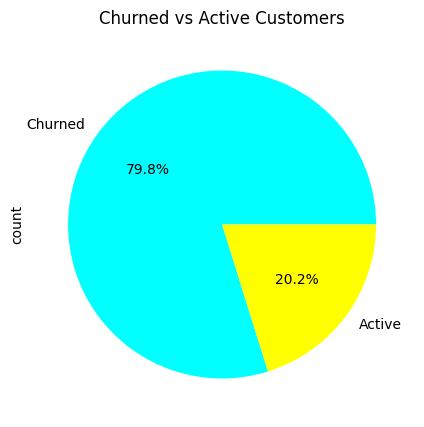

In [41]:
plt.figure(figsize=(5,5))
df['is_churned'].value_counts().plot(kind='pie', labels=['Churned', 'Active'], autopct='%1.1f%%', colors=['cyan','yellow'])
plt.title("Churned vs Active Customers")
plt.show()

**Insight :** Out of total customer pool, **80% are churned**. Only around 20% customers have remained Active.

### Churn Reasons

Understanding reasons for churn can be helpful to identify top issues.

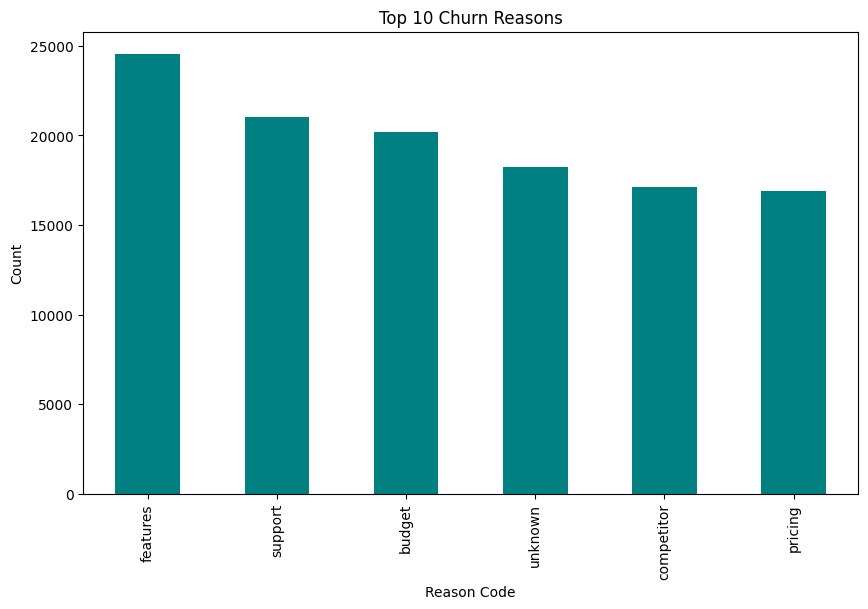

In [46]:
plt.figure(figsize=(10,6))

# To remove "Not churned" before counting the reasons
df[df['reason_code'] != "Not churned"]["reason_code"].value_counts().head(10).plot(kind='bar', color="teal")

plt.title("Top 10 Churn Reasons")
plt.xlabel("Reason Code")
plt.ylabel("Count")
plt.show()

**Insights :** Improving the **features of the products** can reduce churn rate. Also, **better customer support and user friendly budget plans** can improve customer retention.

### Revenue Breakdown

Helps to identify which plan constitutes more in revenue

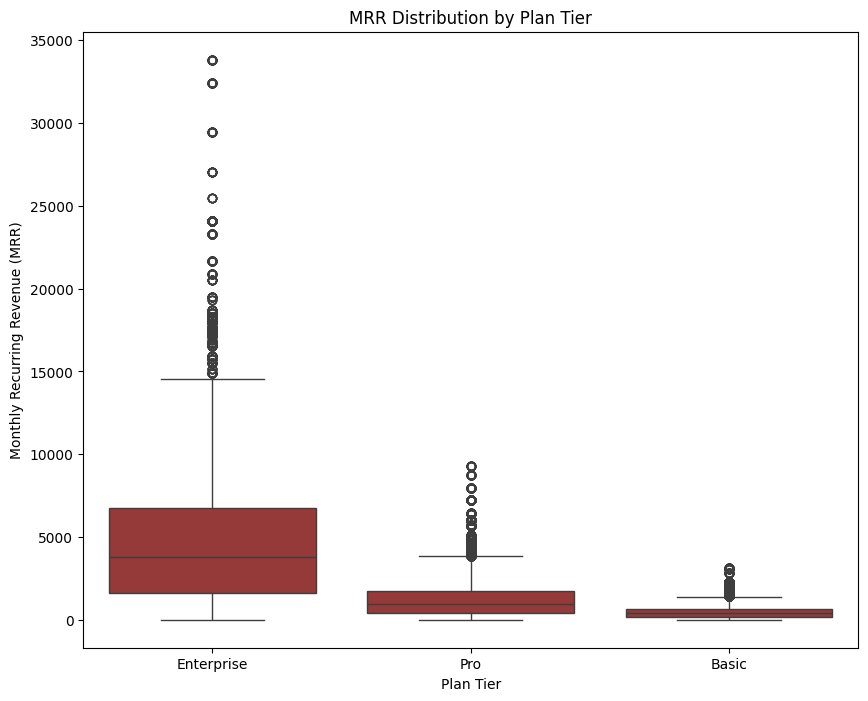

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(x="plan_tier_x",y="mrr_amount", data=df, color="brown")
plt.title("MRR Distribution by Plan Tier")
plt.xlabel("Plan Tier")
plt.ylabel("Monthly Recurring Revenue (MRR)")
plt.show()

**Insights :** Monthly Recurring Revenue generated from **Enterprise tier is nearly twice** of Pro-Plan and Basic Plan combined. Properly **optimising price range** and focusing of **upsell strategy** on Enterprise plan tier can increase the Revenue Generation 

### Subcription Duration

Shows the Duration of customers stay before churning

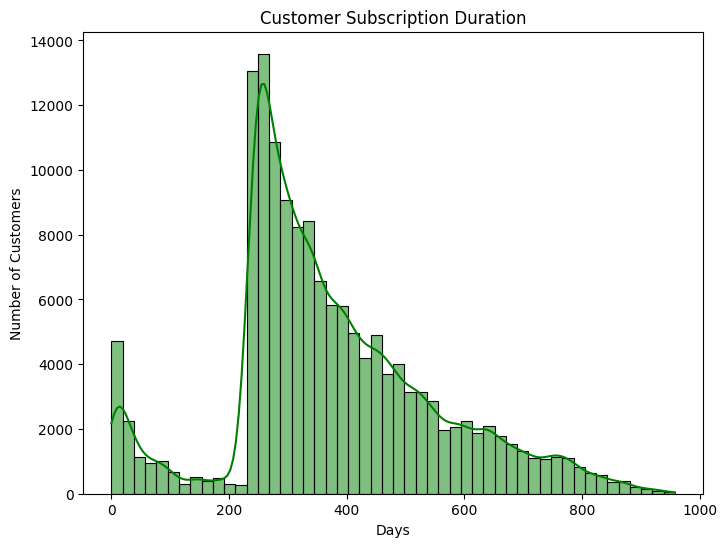

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(df["subscription_duration_days"], bins=50, kde=True, color="green")
plt.title("Customer Subscription Duration")
plt.xlabel("Days")
plt.ylabel("Number of Customers")
plt.show()

**Insights :** There is huge spike of **customer churning right after 200 days** of subscription. **Introducing rewards and offers** for subscribers who remains active for 200 days can reduce this churn spike.

### Geographic Analysis

Helps to understand the Market penetration on different countries

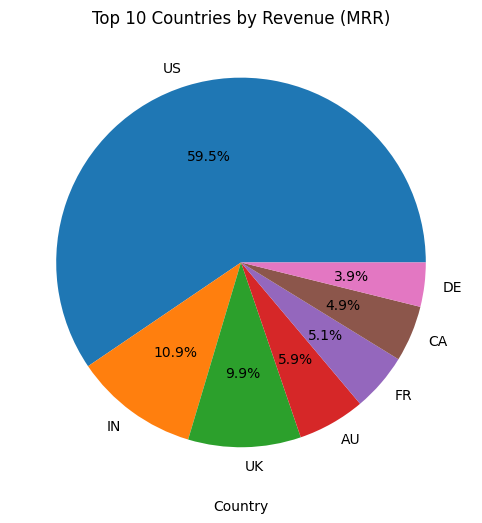

In [11]:
plt.figure(figsize=(10,6))
top_countries = df.groupby("country")["mrr_amount"].sum().nlargest(10)
top_countries.plot(kind="pie", autopct='%1.1f%%', color=['brown',"red",'orange','yellow','green','blue','indigo'])
plt.title("Top 10 Countries by Revenue (MRR)")
plt.xlabel("Country")
plt.ylabel("")
plt.show()

**Insights :** Around **60% share of revenue** is generated solely from **United States of America**. US specific plans and offers are more likely to benefit in Revenue generation.

### Churn Rate by Industry

Helps to identify industry segments that churns more

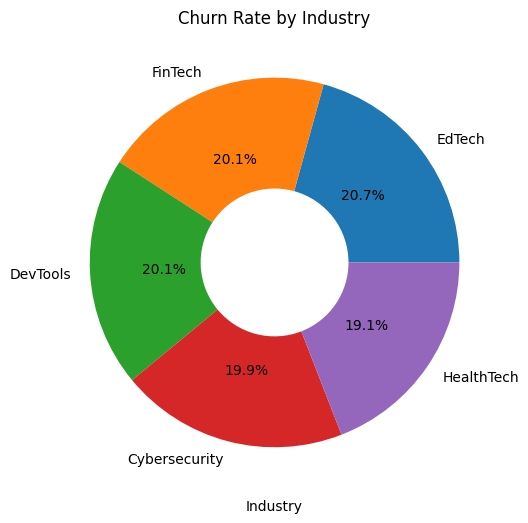

In [15]:
plt.figure(figsize=(10,6))
industry_churn = df.groupby("industry")["is_churned"].mean().sort_values(ascending=False)
industry_churn.plot(kind="pie", autopct='%1.1f%%', color =["violet","indigo",'blue','green','yellow',], wedgeprops=dict(width=0.6))
plt.title("Churn Rate by Industry")
plt.xlabel("Industry")
plt.ylabel("")
plt.show()

**Insights :** Churn rate is **highest in EdTech Industry** and **lowest in HealthTech Industry** with relatively small difference of 2%. Targeting more stabled HealthTech industry will be beneficial for growth. 

### Feature Usage

Helps in identifying the features that customers loves the most

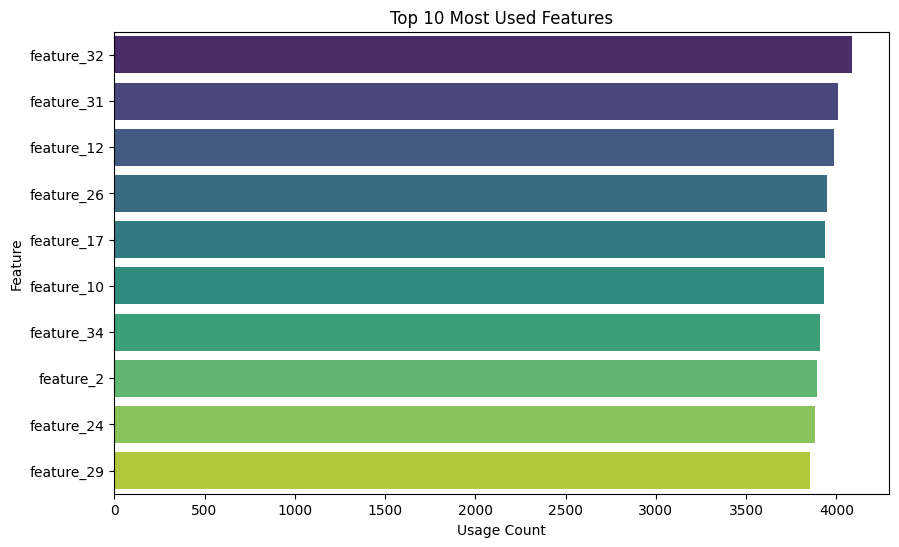

In [47]:
plt.figure(figsize=(10,6))
top_features = df["feature_name"].value_counts().head(10)
sns.barplot(x=top_features.values, y=top_features.index, hue=top_features.index, palette='viridis')
plt.title("Top 10 Most Used Features")
plt.xlabel("Usage Count")
plt.ylabel("Feature")
plt.show()

**Insights :** Feature 32 is the most used feature followed by feature 31 and feature 12 

### Support and Satisfaction

Helps to identify relationship between resolution time and customer satisfaction

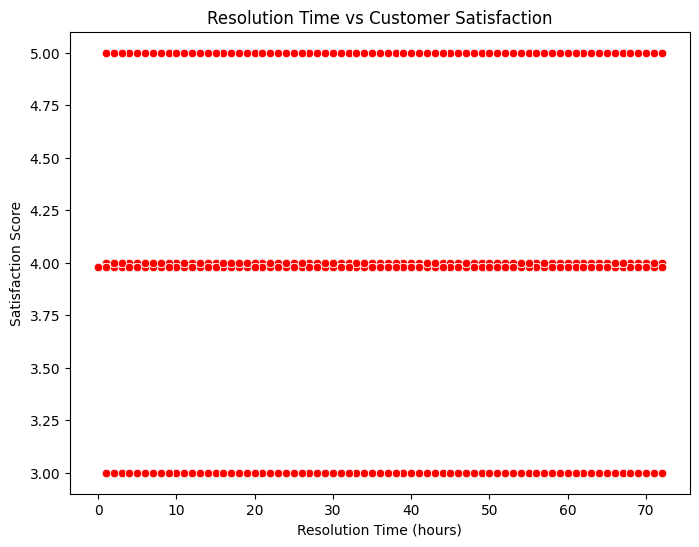

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="resolution_time_hours",y="satisfaction_score", data=df, color="red")
plt.title("Resolution Time vs Customer Satisfaction")
plt.xlabel("Resolution Time (hours)")
plt.ylabel("Satisfaction Score")
plt.show()

**Insights :** There is **no direct relationship** visible between resolution hours and customer satisfaction. However, majority of the customers has given **average satisfaction score of 4** irrespective of resolution time taken.

### Error rate for Churned vs Active Customers

Helps to understand how bugs affect customer retention.

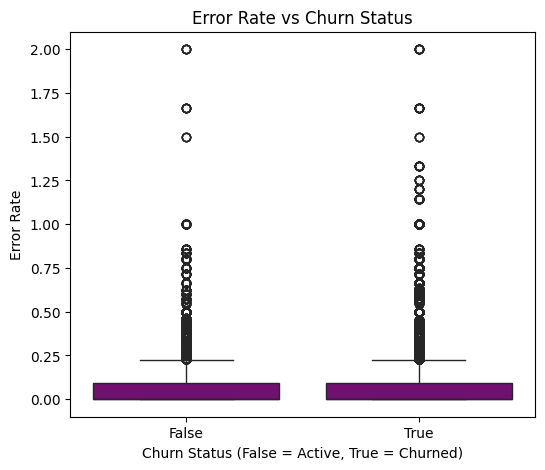

In [8]:
plt.figure(figsize=(6,5))
sns.boxplot(x="is_churned",y="error_rate", color="purple", data=df)
plt.title("Error Rate vs Churn Status")
plt.xlabel("Churn Status (False = Active, True = Churned)")
plt.ylabel("Error Rate")
plt.show()

**Insights :** The trend shows an **increase in Customer churn** when error rate exceeds **above 1%**. Keeping error rate below 1% is Optimal. 

### High-Value Accounts

Helps to understand the churn rate among high-value users

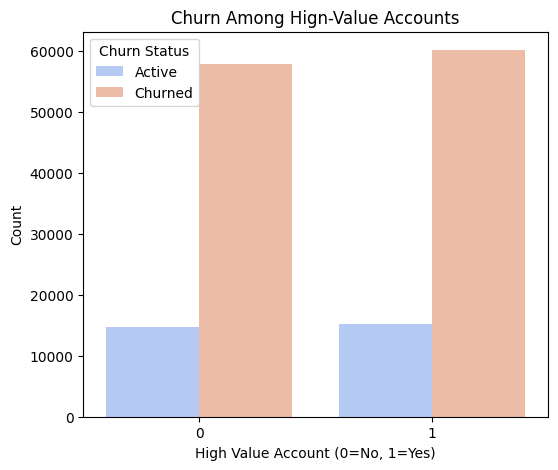

In [49]:
plt.figure(figsize=(6,5))
sns.countplot(x="is_high_value_account", hue="is_churned", palette="coolwarm", data=df)
plt.title("Churn Among Hign-Value Accounts")
plt.xlabel("High Value Account (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Churn Status", labels=["Active","Churned"])
plt.show()

**Insights:** Churn rate is **slightly higher in premium accounts** than normal accounts with a **difference of around 5%**.  

### Upgrade vs Downgrade Trends

Shows whether the customers are moving up or down in plans.

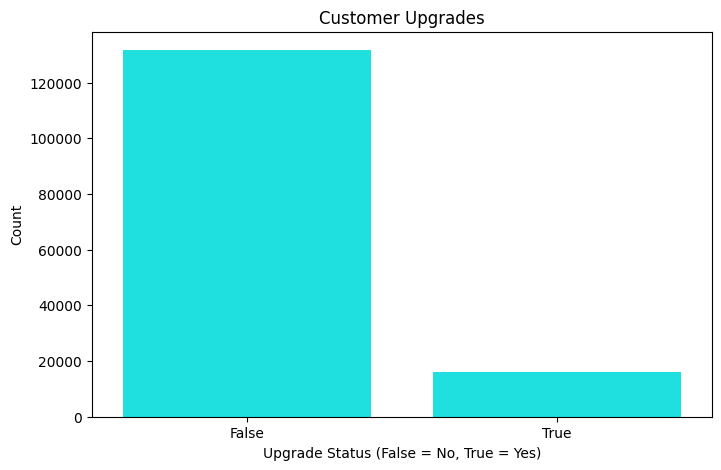

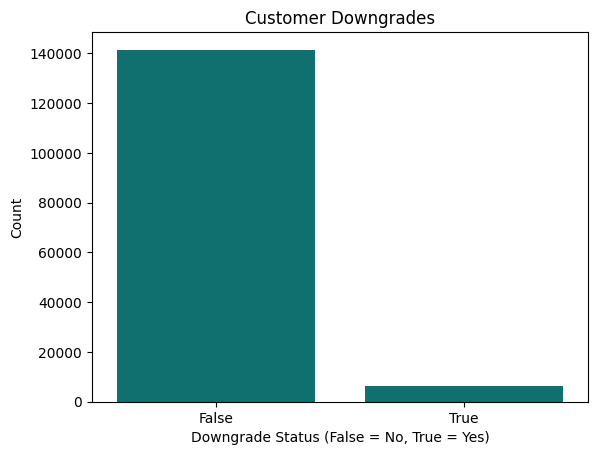

In [50]:
plt.figure(figsize=(8,5))
upgrade_counts = df["upgrade_flag"].value_counts()
downgrade_counts = df["downgrade_flag"].value_counts()

# Upgrades plot
sns.countplot(x="upgrade_flag", color = 'cyan', data=df)
plt.title("Customer Upgrades")
plt.xlabel("Upgrade Status (False = No, True = Yes)")
plt.ylabel("Count")
plt.show()

# Downgrades Plot
sns.countplot(x="downgrade_flag", color = 'teal',  data=df)
plt.title("Customer Downgrades")
plt.xlabel("Downgrade Status (False = No, True = Yes)")
plt.ylabel("Count")
plt.show()

**Insights:** Vast majority of users neither upgrades nor downgrades their plan. But out of those users who changes plan, **Upgrading users outweigh downgrading users by almost two folds**.

### Trail Conversion Rate

Helps to check whether free trails are converting into paying customers.

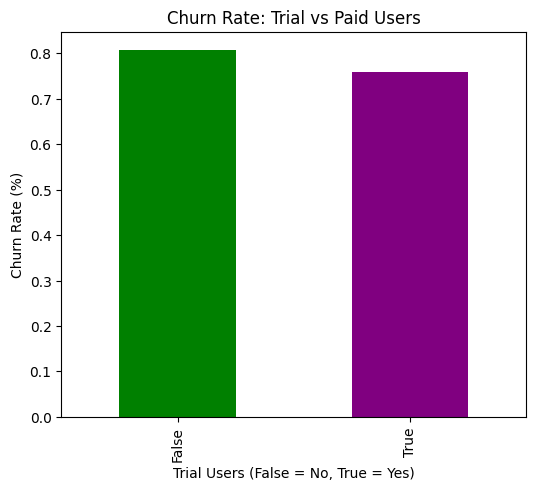

In [15]:
plt.figure(figsize=(6,5))
trial_conv = df.groupby("is_trial_y")["is_churned"].mean()

trial_conv.plot(kind="bar",  color=['green','purple'])
plt.title("Churn Rate: Trial vs Paid Users")
plt.xlabel("Trial Users (False = No, True = Yes)")
plt.ylabel("Churn Rate (%)")
plt.show()

**Insights :** Churn rate of trial users is **almost 75%** which shows the **weak flow in onboarding**. Churn rate in trial users is lower than in paid users, but only by a difference of around 5%. 

### Churn vs Subscription Duration

This graph confirms if short-lived users churn more.

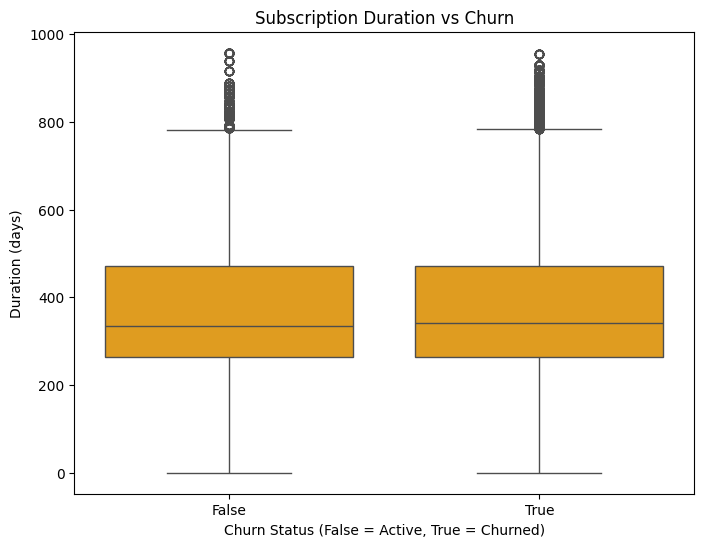

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x="is_churned",y="subscription_duration_days", color ='orange', data=df)
plt.title("Subscription Duration vs Churn")
plt.xlabel("Churn Status (False = Active, True = Churned)")
plt.ylabel("Duration (days)")
plt.show()

**Insights :** Average subscription duration for both Active and Churn Users **lies between 300 to 500 days**. A slight increase in user churn is seen after 800 days of subscription. 

### Downgrade Impact on Churn

Helps to understand whether plan downgrades implies a warning signal for churn

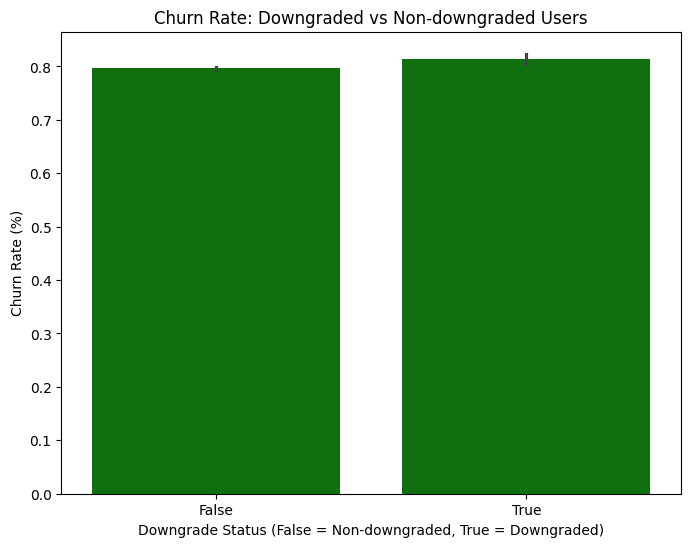

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x="downgrade_flag", y="is_churned",color = "green", data=df)
plt.title("Churn Rate: Downgraded vs Non-downgraded Users")
plt.xlabel("Downgrade Status (False = Non-downgraded, True = Downgraded)")
plt.ylabel("Churn Rate (%)")
plt.show()

**Insights :** Around **80% of the downgraded users have churned**. But at the same time, the difference of churn rate between Non-downgraded users and downgraded users is less than 5%. 

### Revenue at Risk

Helps in calculating revenue lost due to churn

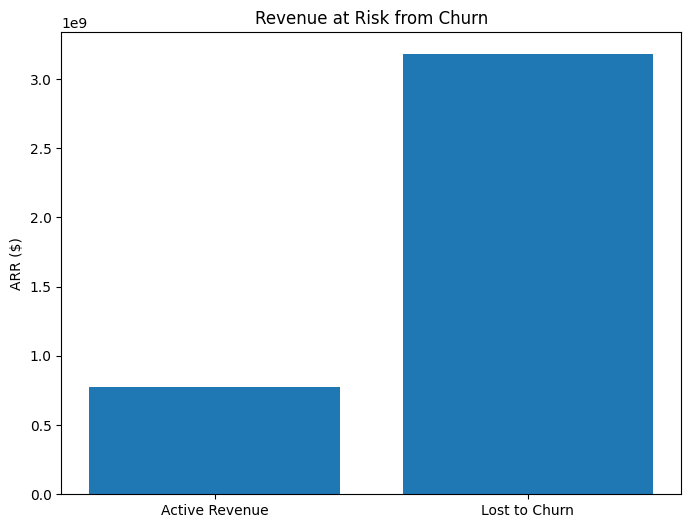

In [26]:
plt.figure(figsize=(8,6))
lost_revenue = df[df["is_churned"]==1]["arr_amount"].sum()
active_revenue = df[df["is_churned"]==0]["arr_amount"].sum()

plt.bar(["Active Revenue","Lost to Churn"],[active_revenue, lost_revenue],)
plt.title("Revenue at Risk from Churn")
plt.ylabel("ARR ($)")
plt.show()

**Insights :** Revenue lost to churn amounts to **almost three times** of Active Revenue. Major intervention is needed for customer retention to prevent the revenue loss.

### Churn Rate by Plan type

To compare the churn rate among different plan types.

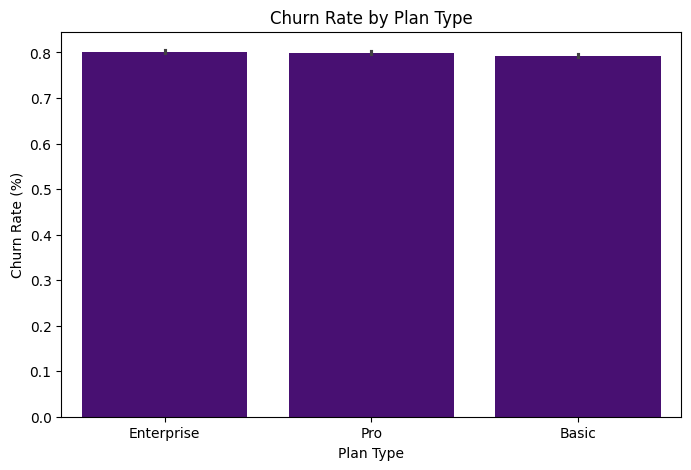

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x="plan_tier_x", y="is_churned", color='indigo', data=df)
plt.title("Churn Rate by Plan Type")
plt.xlabel("Plan Type")
plt.ylabel("Churn Rate (%)")
plt.show()

**Insights :** Churn rate across different plan tier stands at around 80%. But, if considering slight differences, **Enterprise plan have highest churn rate** and Basic plan have the lowest.

## Conclusion

The SaaS platform is experiencing an unsustainably **high churn rate (≈80%)**, leading to **revenue loss that is nearly 3x higher than active revenue**—a critical red flag for business sustainability. 

**The churn problem is multi-dimensional:** 
1. Weak trial-to-paid onboarding (75% churn in trials). 
2. Sharp drop-offs around milestone periods (200+ days, 800+ days). 
3. High downgrade-to-churn conversion. 
4. Churn across all plan tiers, with Enterprise contributing the most absolute revenue loss despite being the top generator.

Long-term impact is clear: unless churn is tackled head-on, even the strong revenue contributions from the U.S. market and the Enterprise tier will erode. To counter this, the company must adopt a retention-first strategy, focused on three pillars:

1. **Product & Customer Experience:**
Reduce error rates below 1%, prioritize feature development around heavily used features (32, 31, 12), and strengthen trial onboarding to prevent early churn. Customer satisfaction is not strictly tied to resolution speed but needs proactive support, user-friendly pricing, and feature improvements.

2. **Lifecycle Intervention:**
Launch churn-prevention triggers at key lifecycle points—e.g., loyalty rewards/offers at the 200-day mark and engagement strategies post 800 days. Pricing optimization and upsell strategies should center on Enterprise customers but balanced with plans to reduce its disproportionately high churn.

3. **Market & Segment Focus:**
Double down on U.S.-specific strategies since it drives around 60% share of revenue, while diversifying into more stable industries like HealthTech (lowest churn). EdTech should be carefully managed or approached with tailored retention strategies.

In short, the company cannot “grow out of” this churn problem—it must aggressively optimize onboarding, strengthen product stickiness, and implement lifecycle-driven retention tactics. Only by shifting from acquisition-led growth to retention-led growth can it stop bleeding revenue and build sustainable long-term profitability.